

####SVM

In this experiment, we are using SVM.  

* SVM assumes that the data is linearly separable.

* It chooses the line which is more distant from both the classes.

In the SVM algorithm, we find the points closest to the line from both the classes. These points are called support vectors. We compute the distance between the line and the support vectors which is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is called the optimal hyperplane.

![alttxt](https://www.researchgate.net/profile/Chittaranjan_Rout/publication/268232391/figure/fig5/AS:295357939503107@1447430228355/Hyperplane-blue-line-representation-in-SVM-Red-and-blue-circles-represent-data-points.png)





####In this experiment we will follow the below steps:



1. Generate the dataset

2. Randomly choose an intercept and slope (m,c). Then attempt to draw a straight line which separates the two sets of data

3. Maximize the Margin

4. Try to fit the model

5. Visualize the decision boundaries

6. We will learn Support vectors
    


### Import required packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

### 1. Load the dataset

Considering the simple case of a classification task, in which the two classes are well separated.

In [5]:
# n_samples is the total number of points equally divided among clusters.
# centers, the number of centers to generate, or the fixed center locations.
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

In [6]:
# Checking the length of X, y
X.shape, y.shape

((50, 2), (50,))

### 2. Visualize the data to get more sense of data


Matplotlib has a number of built-in colormaps using cmap, For more details refer to the following [link](https://matplotlib.org/tutorials/colors/colormaps.html)

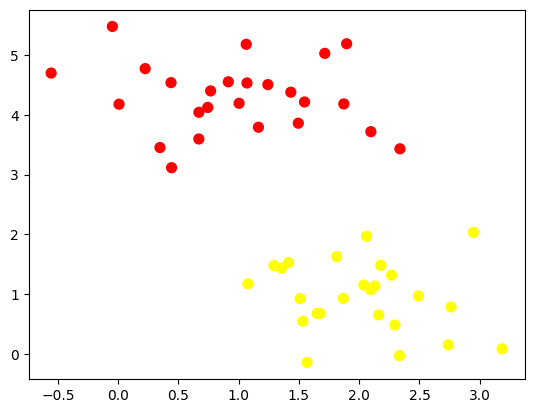

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn"); # s is marker size

### 3. Randomly choose m and c and plot the lines

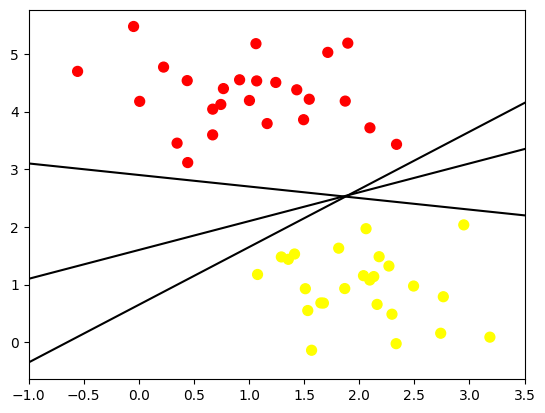

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")

# Randomly choose an intercept and slope to plot a line which separates the two datasets.
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
  #print (m)
  #print (b)
  plt.plot(xfit, m * xfit + b, "-k")
plt.xlim(-1, 3.5)
plt.show()

These are three different separators which discriminate between these samples.

**Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper?**

### 4.  Maximize the Margin

The intuition is that instead of creating a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point.

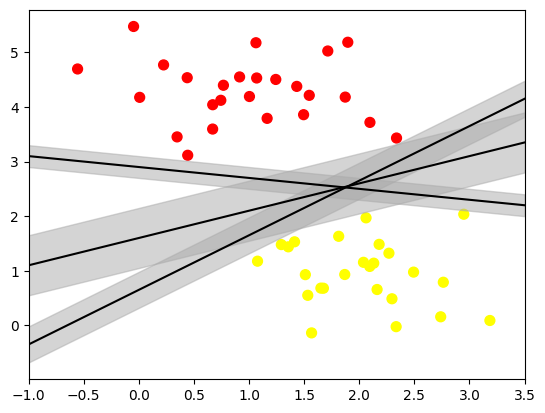

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, "-k")
    # fill_between() is used to fill area between the lines at a time.
    # alpha is to regulate the transparency
    plt.fill_between(xfit, yfit - d, yfit + d,color="#AAAAAA", alpha=0.5)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is  the optimal model. Support vector machines are an example of such a maximum margin estimator.

### 5. Try to fit the model

We will use Scikit-Learn's support vector classifier to train an SVM Linear model on this data.

In [10]:
model = SVC(kernel='linear')
model.fit(X, y)
model.predict(X)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

### 6. Visualize the decision boundaries

(-0.7425578984849813, 3.3721920271976598)


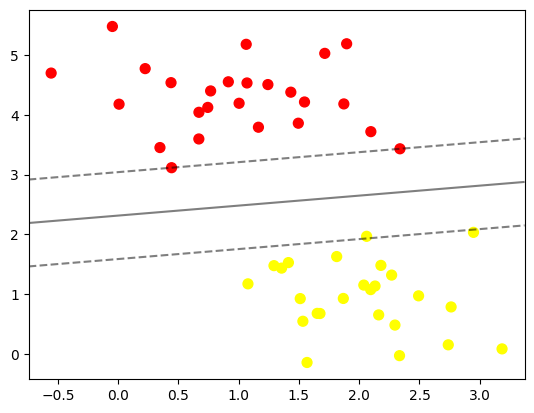

In [11]:
#@title Observe the decision boundaries
# Let us define a function to plot the decision boundaries of SVM
def plot_decision_boundaries(model, ax=None, plot_support=True):

    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    print(xlim)
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_decision_boundaries(model)
plt.show()

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin.
These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name.

In Scikit-Learn, these points are stored in the support_vectors_ attribute of the classifier:

In [12]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])